<a href="https://colab.research.google.com/github/achmadrachmandika/PCVK/blob/main/PCVK_Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Nama: Achmad Rachmandika Rizky Pratama
##Kelas: 3A
##NIM: 2041720125
Pertemuan 12
#Face Detection Method

##Praktikum

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


In [9]:
def display(img, cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')

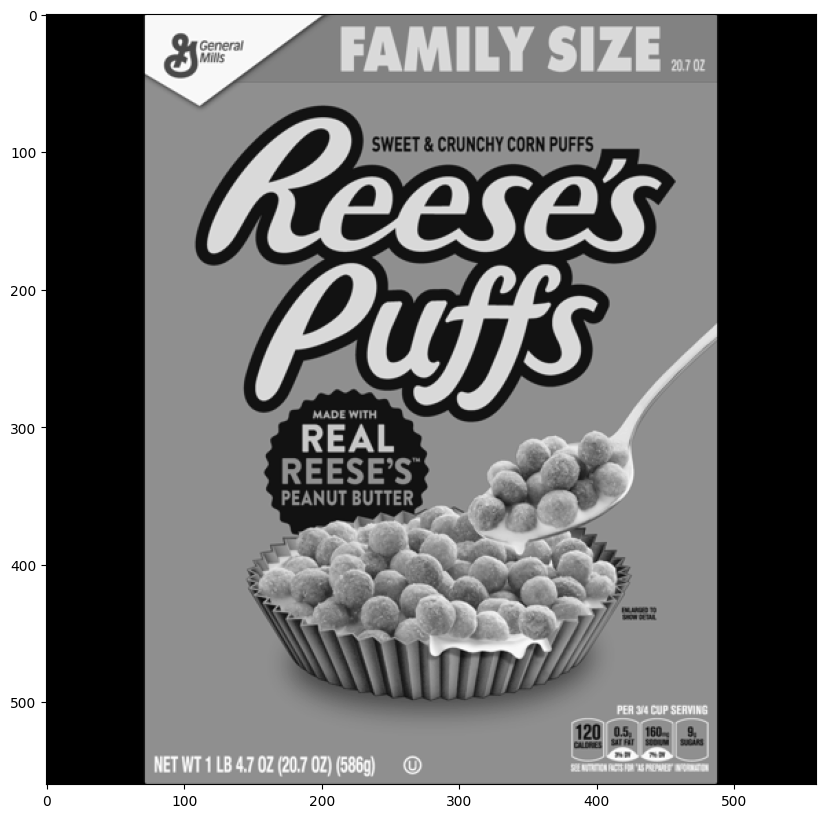

In [10]:
reeses = cv.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week12/Face Detection-20231114T021317Z-001/Face Detection/reeses_puffs.png', 0)
display(reeses)

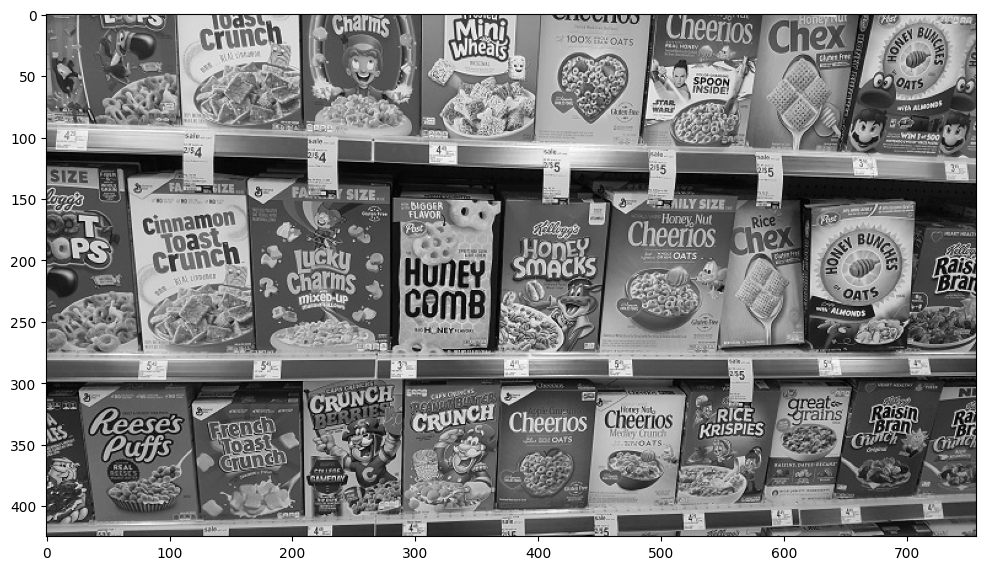

In [11]:
cereals = cv.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week12/Face Detection-20231114T021317Z-001/Face Detection/many_cereals.jpg', 0)
display(cereals)

In [13]:
import cv2 as cv

orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
single_match = matches[0]
single_match_distance = single_match.distance

print(single_match_distance)

71.0


In [14]:
len(matches)

139

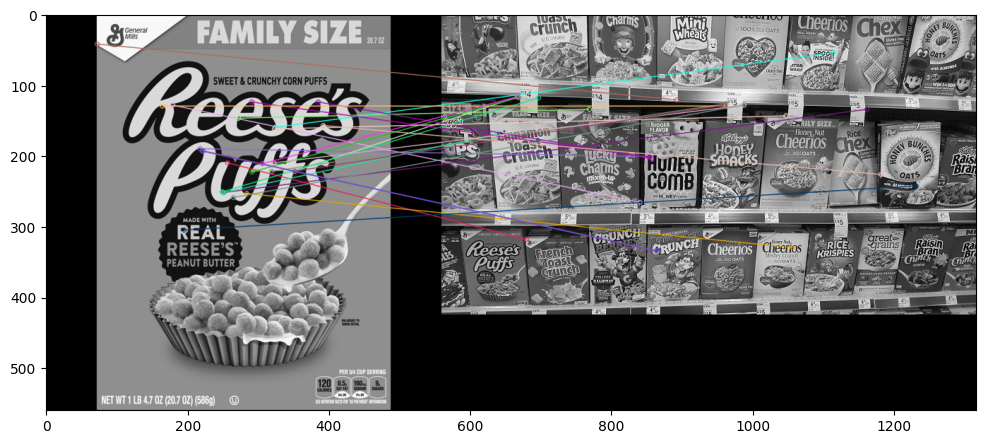

In [15]:
matches = sorted(matches,key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_match)

In [18]:
sift = cv.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good = []

for match1, match2 in matches:
    if match1.distance < 0.75 * match2.distance:
        good.append(match1)

len(good)

79

In [19]:
len(matches)

1501

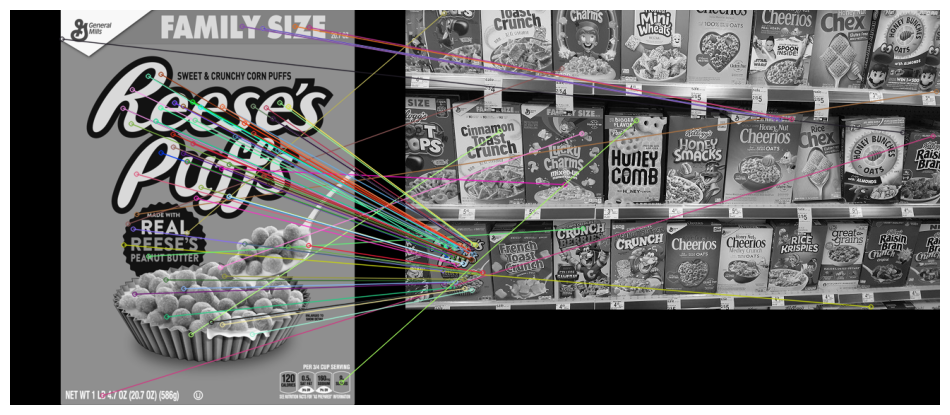

In [30]:
sift_matches = cv.drawMatches(reeses, kp1, cereals, kp2, good, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

def display(img, cmap='gray'):
    plt.figure(figsize=(12, 10))
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

display(sift_matches)

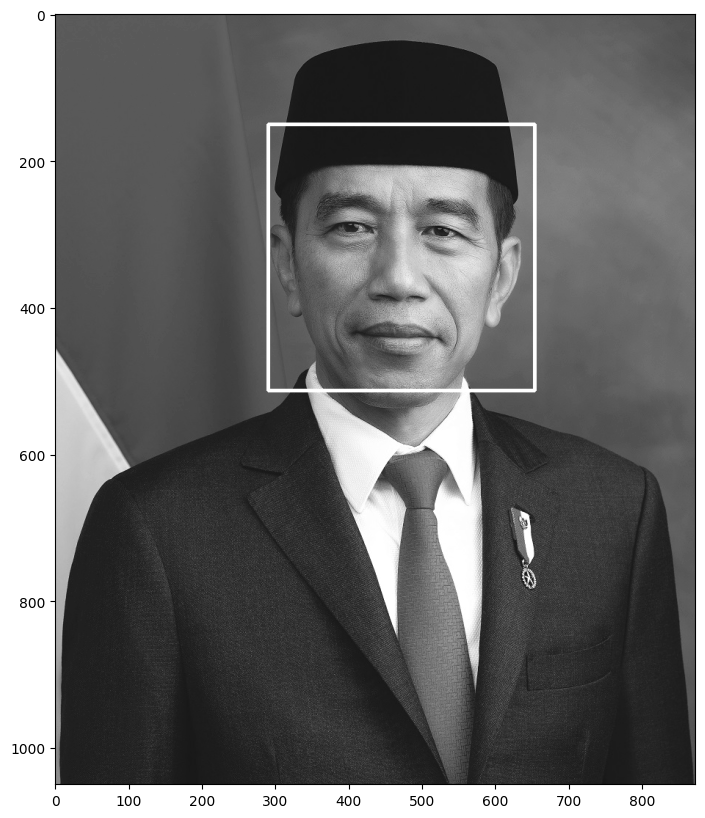

In [33]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week12/Face Detection-20231114T021317Z-001/Face Detection/haarcascade_frontalface_alt.xml')
jokowi = cv.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week12/Face Detection-20231114T021317Z-001/Face Detection/jokowi.jpg', 0)
roi_wajah = cascade_wajah.detectMultiScale(jokowi)

for (x, y, w, h) in roi_wajah:
    cv.rectangle(jokowi, (x, y), (x+w, y+h), (255, 255, 255), 3)

plt.figure(figsize=(10, 10))
plt.imshow(jokowi, cmap='gray')

##Tugas Praktikum

##2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet).

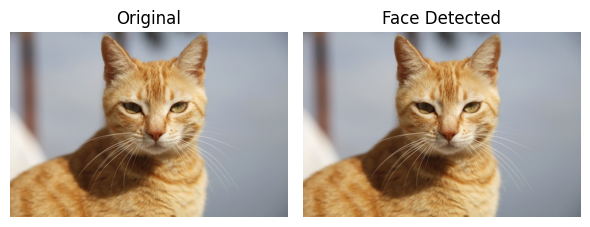

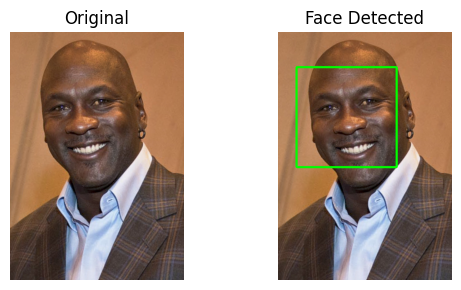

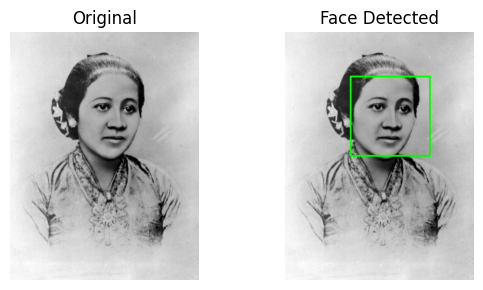

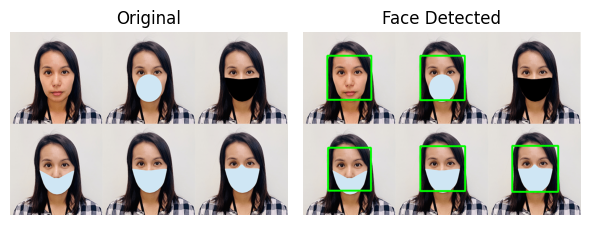

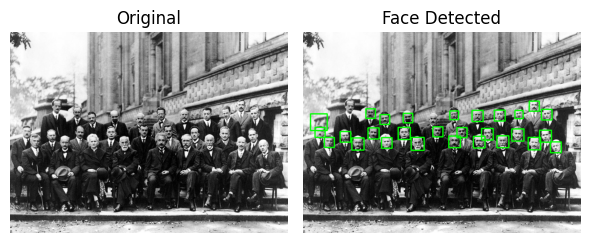

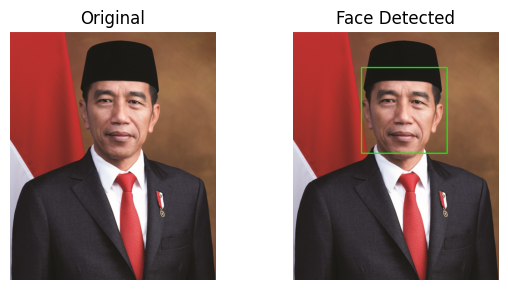

In [53]:
import cv2 as cv
import os
import matplotlib.pyplot as plt

# Load the face cascade classifier
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week12/Face Detection-20231114T021317Z-001/Face Detection/haarcascade_frontalface_alt.xml')

# Path to the folder containing the images
folder_path = '/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week12/facedet'

# Iterate over the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        # Read the image
        image_path = os.path.join(folder_path, filename)
        image = cv.imread(image_path)

        # Detect faces in the image
        roi_wajah = cascade_wajah.detectMultiScale(image)

        # Create a subplot to display original and processed images
        fig, axes = plt.subplots(1, 2, figsize=(6, 3))

        # Display the original image
        axes[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
        axes[0].set_title('Original')
        axes[0].axis('off')

        # Draw rectangles around the detected faces (green color)
        image_with_rect = image.copy()
        for (x, y, w, h) in roi_wajah:
            cv.rectangle(image_with_rect, (x, y), (x+w, y+h), (0, 255, 0), 3)

        # Display the processed image with the detected faces
        axes[1].imshow(cv.cvtColor(image_with_rect, cv.COLOR_BGR2RGB))
        axes[1].set_title('Face Detected')
        axes[1].axis('off')

        # Adjust the spacing between subplots
        plt.tight_layout()

        # Show the plot
        plt.show()

3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah
kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini,
perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada
jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui
search engines.

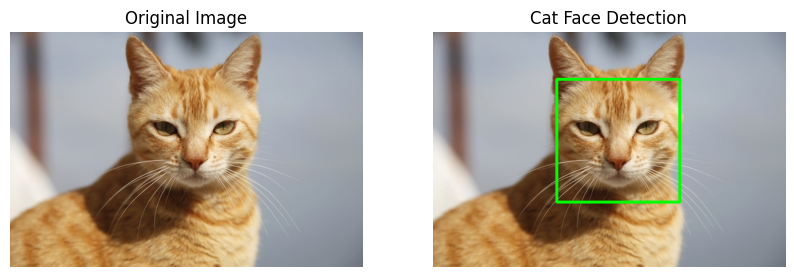

In [108]:
# Load the cat image
kucing = cv.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week12/Face Detection-20231114T021317Z-001/Face Detection/mycat.jpg')
kucing_face_detected = kucing.copy()

# Your cat face cascade for detection
cascade_kucing = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalcatface.xml")

# Detect faces in the 'kucing' image
roi_wajah_kucing = cascade_kucing.detectMultiScale(kucing_face_detected)

# Draw rectangles around the detected cat faces
for (x, y, w, h) in roi_wajah_kucing:
    cv.rectangle(kucing_face_detected, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Display the original 'kucing' image and image with cat face detection
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(cv.cvtColor(kucing, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(kucing_face_detected, cv.COLOR_BGR2RGB))
ax[1].set_title('Cat Face Detection')
ax[1].axis('off')

plt.show()

4. Cobakan juga untuk eyes detection.

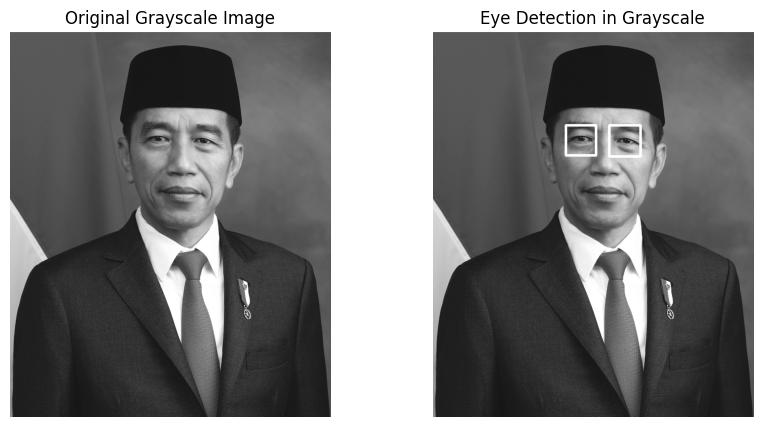

In [107]:
# Load the image
jokowi = cv.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week12/Face Detection-20231114T021317Z-001/Face Detection/jokowi.jpg')
jokowi_face_detected = jokowi.copy()

# Detect faces
roi_wajah = cascade_wajah.detectMultiScale(jokowi_face_detected)

# Your eye cascade for eye detection
cascade_mata = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_eye.xml")

# For each face, detect eyes and draw rectangles around the eyes
for (x, y, w, h) in roi_wajah:
    face_roi = jokowi_face_detected[y:y+h, x:x+w]  # Extract the face region
    eyes = cascade_mata.detectMultiScale(face_roi)

    for (ex, ey, ew, eh) in eyes:
        cv.rectangle(face_roi, (ex, ey), (ex+ew, ey+eh), (255, 255, 255), 5)

# Convert the 'jokowi_face_detected' image to grayscale
jokowi_face_detected_gray = cv.cvtColor(jokowi_face_detected, cv.COLOR_BGR2GRAY)

# Display the original 'jokowi' image in grayscale and the 'jokowi_face_detected' image with eye detection in grayscale
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(cv.cvtColor(jokowi, cv.COLOR_BGR2GRAY), cmap='gray')
ax[0].set_title('Original Grayscale Image')
ax[0].axis('off')

ax[1].imshow(jokowi_face_detected_gray, cmap='gray')
ax[1].set_title('Eye Detection in Grayscale')
ax[1].axis('off')

plt.show()

5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya
tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link
berikut: https://www.youtube.com/watch?v=YjWh7QvVH60

In [96]:
# import dependencies
import io
import html
import time
%matplotlib inline
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
from matplotlib import pyplot as plt

Helper Functions

Below are a few helper function to make converting between different image data types and formats.

In [97]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

Haar Cascade Classifier

For this tutorial we will run a simple object detection algorithm called Haar Cascade on our images and video fetched from our webcam. OpenCV has a pre-trained Haar Cascade face detection model.

In [98]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

##Webcam Images

Running code on images taken from webcam is fairly straight-forward. We will utilize code within Google Colab's Code Snippets that has a variety of useful code functions to perform various tasks.

We will be using the code snippet for Camera Capture to utilize your computer's webcam.

In [99]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


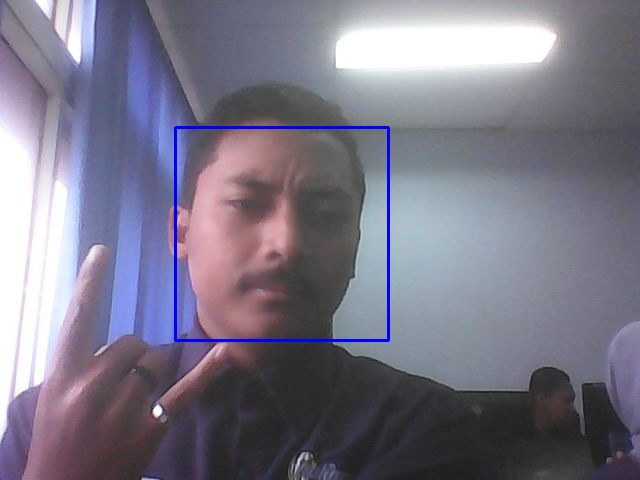

In [102]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Webcam Videos

Running code on webcam video is a little more complex than images. We need to start a video stream using our webcam as input. Then we run each frame through our progam (face detection) and create an overlay image that contains bounding box of detection(s). We then overlay the bounding box image back onto the next frame of our video stream.

In [103]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [105]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.
Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

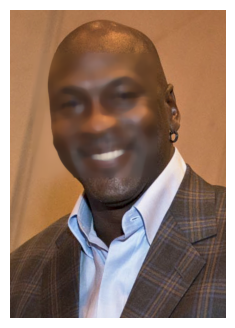

In [79]:
# Load the face cascade classifier
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week12/Face Detection-20231114T021317Z-001/Face Detection/haarcascade_frontalface_alt.xml')

# Load the image
jordan = cv.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week12/Face Detection-20231114T021317Z-001/Face Detection/mjordan.jpg')

# Convert the image to grayscale
gray = cv.cvtColor(jordan, cv.COLOR_BGR2GRAY)

# Detect faces in the image
roi_wajah = cascade_wajah.detectMultiScale(gray)

# Iterate over the detected faces
for (x, y, w, h) in roi_wajah:
    # Crop the face region
    face_roi = jordan[y:y+h, x:x+w]

    # Apply median blur to the face region
    blurred_face = cv.medianBlur(face_roi, 15)

    # Replace the face region with the blurred face
    jordan[y:y+h, x:x+w] = blurred_face

# Display the image with the blurred faces
plt.figure(figsize=(8, 4))
plt.imshow(cv.cvtColor(jordan, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

7. Lakukan segmentasi karakter pada KTP seperti gambar berikut

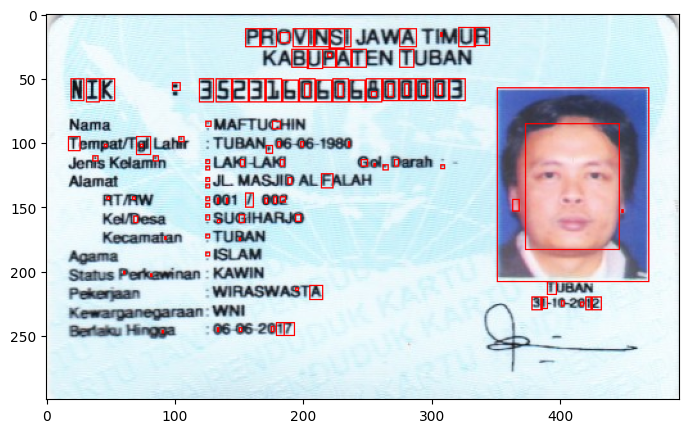

In [81]:
# load data
img = cv.imread('/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week7/ktp/ktp3.png')


blurred = cv.GaussianBlur(img, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

8. Lakukan cropping pada bagian NIK saja sehingga muncul hasil sebagai berikut

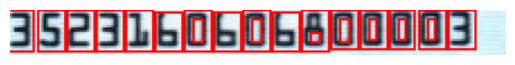

In [85]:
# Koordinat cropping
crop_y_start = 50
crop_y_end = 70
crop_x_start = 120
crop_x_end = 340

# Melakukan cropping pada gambar
cropped_image = img[crop_y_start:crop_y_end, crop_x_start:crop_x_end]

# Menampilkan gambar hasil cropping
plt.imshow(cv.cvtColor(cropped_image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

9. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter
Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan
training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa
gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya
gunakan source code di bawah ini untuk proses persiapan untuk training.

In [86]:
import os
import tqdm
import cv2
import random
import numpy as np
import pickle

In [89]:
DATADIR = "/content/drive/MyDrive/Kuliah Semester 5/PCVK/Week12/Dataset"
dirs = []
training_data = []
width, height = 100, 100

# Looping direktori data training untuk diambil nama karakternya
for char_name in sorted(os.listdir(DATADIR)):
    dirs.append(char_name)

# Looping semua image data training untuk diubah menjadi array
for char_name in dirs:
    path = os.path.join(DATADIR, char_name)
    class_number = dirs.index(char_name)
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (width, height))
            training_data.append([new_array, class_number])
        except Exception as e:
            pass

random.shuffle(training_data)

X = []
Y = []

for features, label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, width, height, 1)

# Tulis ke file pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

Lakukan Training Data

In [92]:
import pickle
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

In [94]:
# Load file pickle
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("Y.pickle", "rb")
Y = pickle.load(pickle_in)
Y = to_categorical(Y)
X = X / 255.0
width, height = 100, 100

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
flaten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer
outputs = Dense(34, activation='softmax')(fc_layer)

adam = Adam(lr=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, Y, epochs=20, verbose=1)
model.save('anpr.model')

ValueError: ignored